# Funciones, Ejemplo: Estimar el número π
A continuación escribiremos la primera función. 

Existen diversos métodos de estimar el número π, entre estos, series de Taylor, la fórmula de Madhava, Euler, Wallis y el algoritmo de John Machin. [Más detalles.](https://julialang.org/blog/2017/03/piday) 

Los ejemplos presentados se basan en [Julia for Pythonistas](https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_for_Pythonistas.ipynb)

Uno de los sencillos de implementar es usando la sucesión:
$π = 4 \times \left(1 - \dfrac{1}{3} + \dfrac{1}{5} - \dfrac{1}{7} + \dfrac{1}{9}-\dfrac{1}{11}+\dots\right)$

In [1]:
function estimate_pi(n)
    s = 1.0
    println(n)
    for i in 1:n
        s += (isodd(i) ? -1 : 1) / (2i + 1)
    end
    4s
end

# Nótese que _ se usa como separador de miles
p = estimate_pi(100_000_000)
println("El valor estimado de π ≈ $p")

# El valor de pi es una constante bajo el símbolo o carácter unicode π
# Es equivalente a pi o \pi
println("El error es $(p - π)")

# PI es un número Irracional
println(pi)
println(typeof(pi))
println(typeof(π))

100000000
El valor estimado de π ≈ 3.141592663589326
El error es 9.999532757376528e-9
π
Irrational{:π}
Irrational{:π}


### Código Similar en Python

```python
import math
 
def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s
 
p = estimate_pi(100_000_000)

# f-strings está disponible a partir de la versión 3.6 de Python
print(f"El valor estimado de π ≈ {p}") 
print(f"El error es {p - math.pi}")
```

### Diferencias Sutiles

|Julia|Python
|-----|------
|`function` | `def`
|`for i in X`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `for i in X:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`1:n` | `range(1, n+1)`
|`cond ? a : b` | `a if cond else b`
|`2i + 1` | `2 * i + 1`
|`4s` | `return 4 * s`
|`println(a, b)` | `print(a, b, sep="")`
|`print(a, b)` | `print(a, b, sep="", end="")`
|`"$p"` | `f"{p}"`
|`"$(p - π)"` | `f"{p - math.pi}"`

### Otras consideraciones

* La identación en Julia no tiene relevancia sintáctica, esta se recomienda para que el código sea legible. 
* Los bloques en julia terminan con `end`.
* Julia puede ser más conciso en su sintaxis, por ejemplo: 4 * s se puede definir también como 4s.
* No es necesario importar muchas de las características matemáticas, por ejemplo, pi o π.
* La palabra clave `return` es opcional. Se retorna el último valor de la última expresión (`4s` en el ejemplo).
* Julia permite trabajar directamente con simbolos Unicode como `π`. También se puede definir a mediante un nombre de variable (ejemplo, `π == pi`).

### Obtener Símbolos Unicode

Es posible obtenerlos a partir de su representación en latex. [Tabla de símbolos latex](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)

In [2]:
#Obtener Simbolos Unicode
using REPL.REPLCompletions: latex_symbols, emoji_symbols

println(latex_symbols["\\pi"])
println(latex_symbols["\\theta"])
println(latex_symbols["\\in"])

π
θ
∈


In [3]:
emoji_symbols["\\:smiley:"]

"😃"

* También se pueden consultar en el notebook escribiendo el código latex entre dobe signo de $.

$$\hat{y}$$

In [4]:
# En Julia
r = 10
𝑦̂ = 23 + 5r
println("El valor estimado de y es: ", 𝑦̂)

El valor estimado de y es: 73


* En Python es similar, las dos diferencias son: 
1. No podemos usar `5r`, este se define como `5*r`. 
2. `println` no existe en python, se usa `print`.

```python
r = 10
𝑦̂ = 23 + 5*r
print("El valor estimado de y es: ", 𝑦̂)
```

### Funciones Genéricas

In [5]:
f(x,y)= x + y

f (generic function with 1 method)

In [6]:
f(10, 8)

18

In [7]:
miFuncion(x, z) = 20 + 2x - 3z

miFuncion (generic function with 1 method)

In [8]:
miFuncion(5, 2)

24

In [9]:
# Análogo a g(x,y) = x * y

function g(x,y) 
    return x * y
end

g (generic function with 1 method)

In [10]:
g(10,20)

200

# Ejecutar Código Python en Julia

In [5]:
# Importamos el paquete para installar paquetes
using Pkg 
# Instalamos el paquete para llamar codigo Python 
Pkg.add("PyCall")

   Updating registry at `C:\Users\Fernan\.julia\registries\General`
  Resolving package versions...
  Installed PyCall ─ v1.92.1
Updating `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
  [438e738f] + PyCall v1.92.1
Updating `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`
  [438e738f] + PyCall v1.92.1
   Building PyCall → `C:\Users\Fernan\.julia\packages\PyCall\BcTLp\deps\build.log`


In [11]:
# Importamos el módulo 
using PyCall

In [12]:
# Versión de python instalada
sys = pyimport("sys")
sys.version

"3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]"

In [13]:
#Usar codigo Python
py"""
import math
 
def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s
 
p = estimate_pi(100_000_000)
print(f"El Valor estimado de π es ≈ {p}")
print(f"El error is {p - math.pi}")
"""

El Valor estimado de π es ≈ 3.141592663589326
El error is 9.999532757376528e-09


In [14]:
# Usar un valor calculado de Python
valorde = py"p"
trespi = 3valorde
println("3π es ", trespi)


3π es 9.424777990767979


In [15]:
# Usar numpy
np = pyimport("numpy")
a = np.random.rand(2, 3)

2×3 Array{Float64,2}:
 0.348598  0.0904924  0.484818
 0.8055    0.615658   0.605433

In [16]:
#Usar valores de Julia en Python
exp_a = np.exp(a)

py"""
import numpy as np

result = np.log($exp_a)
"""

println(py"result")

[0.3485976896130741 0.09049244210949274 0.4848177585126648; 0.8055003764177291 0.6156579814071617 0.605433270653951]


In [17]:
# Instalación de PyPlot
using Pkg 
Pkg.add("PyPlot")

   Updating registry at `C:\Users\Fernan\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`


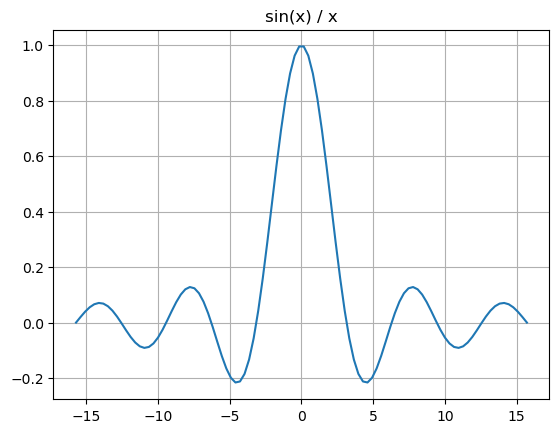

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [18]:
# En Julia se puede usar Matplotlib `pyimport("matplotlib")` 
# pero se recomienda usar PyPlot por razones de rendimiento
# PyPlot se basa en matplotlib
using PyPlot

x = range(-5π, 5π, length=100)
plt.plot(x, sin.(x) ./ x) 
plt.title("sin(x) / x")
plt.grid("True")
plt.show()